#    **GROUP 18: PROJECT PROPOSAL**

GROUP MEMEBERS: Dua Khan, Sohbat Sandhu, Advitya Mittal

## *Impact Of Tobacco Usage On Potiential Heart Failure Patients*

## **Introduction**

<br>For our project, we will analyze the [UCI Heart Failure Clinical Records Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv). 
<br>We are interested in this dataset, as it may help prevent potential heart failure in tobacco users if they receive proper kidney evaluation in the early stages. 
<br>The dataset includes information on high-risk heart failure patients. We will mainly look at patients with a history of tobacco use and analyze their serum creatinine levels. Creatinine is a waste product developed by the muscles flowing in a person's blood. The creatinine is filtered out of the blood by the kidneys. Therefore, higher serum creatinine levels in the blood can be associated with CKD (Chronic Kidney Disease). 
<br> According to [CDC](https://www.cdc.gov/kidneydisease/publications-resources/link-between-ckd-diabetes-heart-disease.html) (Centre for Disease and Prevention Control), Chronic Kidney Disease (CKD) is a considerable risk factor for heart failure. When kidneys stop filtering blood properly, more stress is put on the heart to pump the improperly filtered blood leading to heart diseases and even failure. 
<br>Thus, comparing the serum creatinine levels of high-risk heart failure tobacco users with those of non-tobacco users will help us determine whether or not tobacco use is associated with an increase in the serum creatinine levels, as stated in many studies [(Rudnick & Leonberg-Yoo, 2017)](https://pubmed.ncbi.nlm.nih.gov/28930748/). 

## **Preliminary Results**

### **Data Preparation** (Import, Clean and Wrangle Data)

In [26]:
# Step 1: load libraries
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)

In [27]:
# Step 2: assign the url for heart failure clinincal records dataset
heart_patients_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"

# Step 3: read the csv file and assign the dataframe
patients <- read_csv(heart_patients_url)

# preview dataframe
head(patients)

Rows: 299 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (13): age, anaemia, creatinine_phosphokinase, diabetes, ejection_fractio...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
50,1,111,0,20,0,210000,1.9,137,1,0,7,1
65,1,160,1,20,0,327000,2.7,116,0,0,8,1
90,1,47,0,40,1,204000,2.1,132,1,1,8,1


*Table 1. Table of clinical features of 299 admitted heart failure patients*

The dataset gives clinical features of heart failure patients admitted to the Institute of Cardiology and Allied hospital at Faisalabad in Pakistan from April to December 2015. <br>
The data set contains 13 variables which tell us about the 13 clinical features of heart failure patients:
| Column Name              | Description Of Clinical Feature                                               |
|--------------------------|-------------------------------------------------------------------------------|
| age                      | Age (in yrs)                                                                  |
| anaemia                  | Patient has anaemia (1 = "True", 0 = "False")                                 |
| creatinine_phosphokinase | Level of the CPK enzyme in the blood (mcg/L)                                  |
| diabetes                 | Patient has diabetes (1 = "True", 0 = "False")                                |
| ejection_fraction        | Percentage of blood leaving the heart at each contraction (in %)              |
| high_blood_pressure      | Patient has high blood pressure (1 = "True", 0 = "False")                     |
| platelets                | Platelets in the blood (in kiloplatelets/mL)                                  |
| serum_creatinine         | Level of serum creatinine in the blood (in mg/dL)                             |
| serum_sodium             | Level of serum sodium in the blood (in mEq/L)                                 |
| sex                      | Binary gender (1 = "Male", 0 = "Female")                                      |
| smoking                  | Patient uses tobacco (1 = "True", 0 = "False")                                |
| time                     | Follow-up period (in days)                                                    |
| DEATH_EVENT              | If the patient deceased during the follow-up period (1 = "True", 0 = "False") |

As we are interested in the levels of serum creatinine in blood to analyze if tobacco usage decreases the amounts of serum sodium in blood. We will try to filter out the irrelvant variables in the dataframe.

In [28]:
# Step 4: remove N/A in dataset
# select relevant columns (smoking, serum_creatinine) for our preliminary analysis
patients <- patients %>%
    filter(!is.na(serum_creatinine)) %>%
    select(smoking, serum_creatinine)

# Step 5: reassign values in 'smoking' column to boolean values
smoking_patients <- patients %>%
    filter(smoking == 1) %>%
    mutate(tobacco_users = "True") %>%
    select(-smoking)

non_smoking_patients <- patients %>%
    filter(smoking == 0) %>%
    mutate(tobacco_users = "False") %>%
    select(-smoking)

# Step 6: combine resulting dataframes into one
clean_patients <- rbind(smoking_patients, non_smoking_patients)
head(clean_patients)

serum_creatinine,tobacco_users
<dbl>,<chr>
1.3,True
2.1,True
1.1,True
9.4,True
4.0,True
0.9,True


*Table 2. Table of final dataframe for preliminary analysis with relevant variables.*

### **Preliminary Analysis**

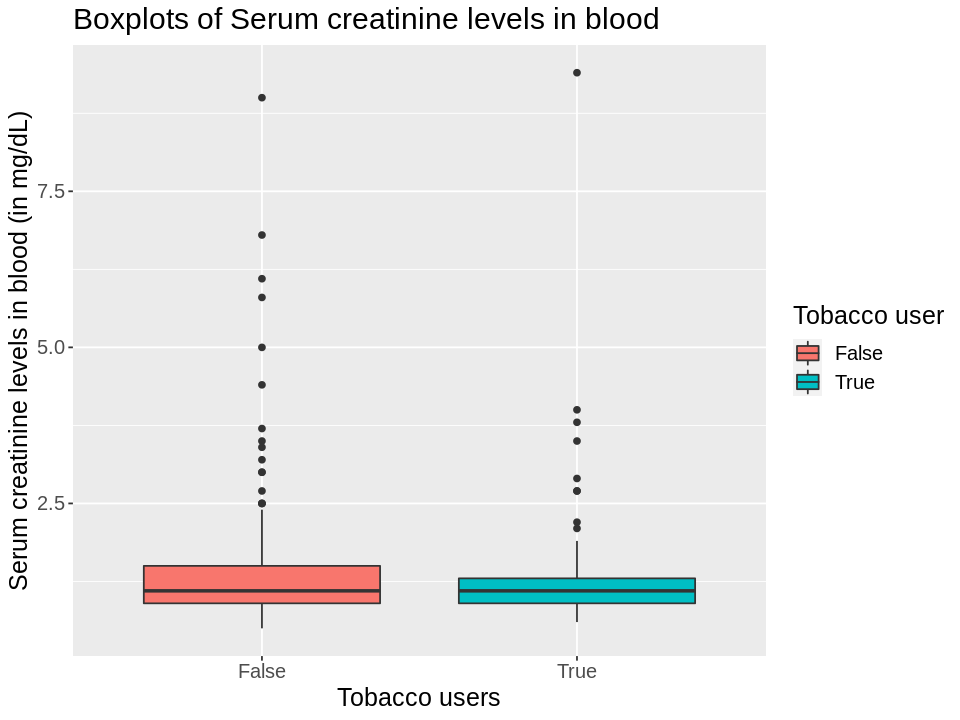

In [29]:
options(repr.plot.width = 8, repr.plot.height = 6)

# Step 7: visualise boxplot to observe difference in serum creatinine levels accoring to tobacco usage
serum_creatinine_boxplot <- clean_patients %>%
    ggplot(aes(x = tobacco_users, y = serum_creatinine, fill = tobacco_users)) +
    geom_boxplot() +
    labs(x = "Tobacco users", y = "Serum creatinine levels in blood (in mg/dL)", fill = "Tobacco user") +
    ggtitle("Boxplots of Serum creatinine levels in blood") +
    theme(text = element_text(size = 15))
serum_creatinine_boxplot

*Figure 1. Side-by-side boxplot of serum creatinine levels in blood of heart failure patients differentiated by tobacco use*

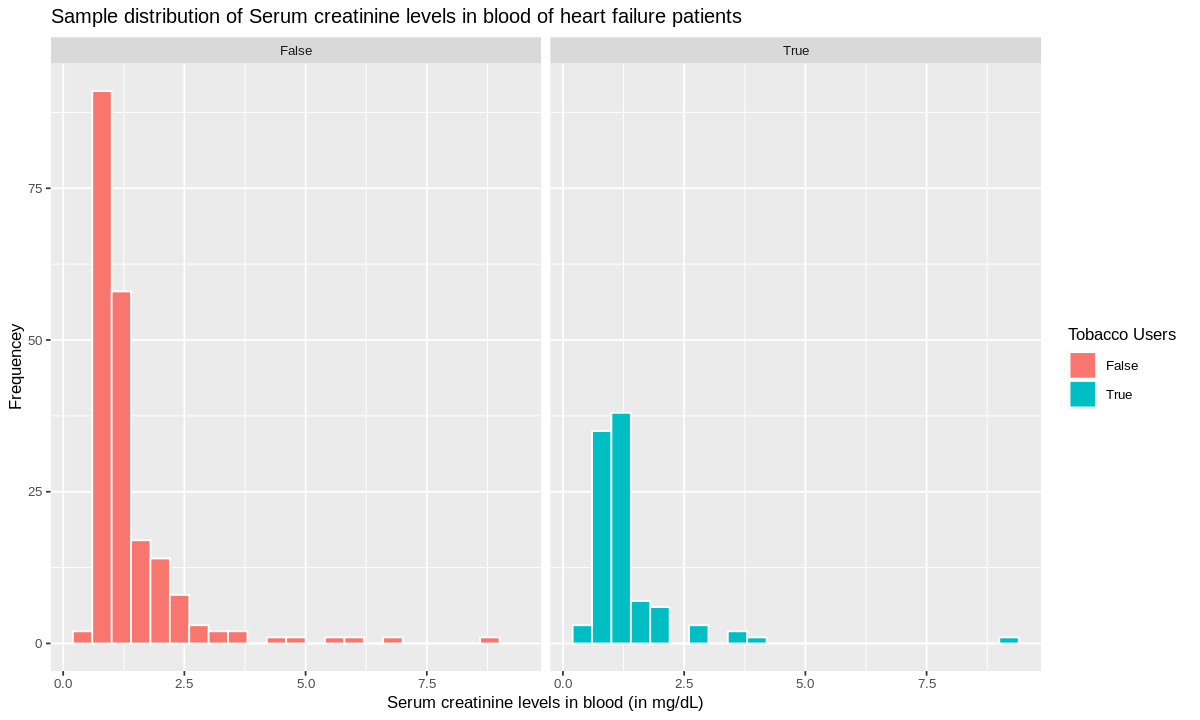

In [30]:
options(repr.plot.width = 10, repr.plot.height = 6)

# Step 9: visualise sample distibutions to observe the difference frequency in serum creatinine levels 
# accoring to tobacco usage
sample_distribution <- clean_patients %>%
    ggplot(aes(x = serum_creatinine, fill = tobacco_users)) +
    geom_histogram(binwidth = 0.4, color = "white") +
    facet_grid(. ~ tobacco_users) +
    labs(x = "Serum creatinine levels in blood (in mg/dL)", y = "Frequencey", fill = "Tobacco Users") +
    ggtitle("Sample distribution of Serum creatinine levels in blood of heart failure patients") +
    theme(text = element_text(size = 10))
sample_distribution

*Figure 2. Side-by-side sample distribution of serum creatinine levels in blood of heart failure patients differentiated by tobacco use*

In [31]:
# Step 8: get summary statistics for above boxplot
print("Summary Statistics for Serum Creatinine Levels of 96 Tobacco users:")
summary(smoking_patients$serum_creatinine)

print("Summary Statistics for Serum Creatinine Levels for 203 Non-tobacco users:")
summary(non_smoking_patients$serum_creatinine)

[1] "Summary Statistics for Serum Creatinine Levels of 96 Tobacco users:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.600   0.900   1.100   1.353   1.300   9.400 

[1] "Summary Statistics for Serum Creatinine Levels for 203 Non-tobacco users:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.500   0.900   1.100   1.413   1.500   9.000 

In [32]:
# compute the observed test statistic
obs_diff_mean <- clean_patients %>% 
    specify(formula = serum_creatinine ~ tobacco_users) %>% 
    calculate(stat = "diff in means", order = c("True", "False")) %>%
    pull()
print("The observed test statistics for hypothesis testing is:")
obs_diff_mean

[1] "The observed test statistics for hypothesis testing is:"


[1] -0.06064142

From *Figure 1* and the corresponding summary statistics, we can observe a slight difference in the mean serum creatinine levels in the blood of tobacco users and non-users. We observe that the mean serum creatinine levels are higher in non-tobacco users.
<br> The above boxplot and sample distribution show the presence of outliers which heavily influences the mean of the distributions, so we cannot say that the trend will remain the same for a larger population.

## **Methods: Plan**

#### Strengths & Limitations

Our proposed report uses the data from 299 heart failure patients admitted to the Institute of Cardiology and Allied hospital at Faisalabad in Pakistan. Our data is from a renowned institution in Faislabad and thus increases the "trustworthiness" of the source. We are using scientifically proven facts regarding the association of serum creatinine levels in blood with tobacco usage. We are using the thought process in the following steps:
1. Tobacco Usage increases the serum creatinine levels in the blood.
2. Increased serum creatinine levels show an increased risk of being susceptible to CKD.
3. Increasing the risk factor of CKD shows an increase in the danger of heart failure. <br>

We can also observe some limitations preventing us from sharing the report with a shareholder as the results from the data is not generalizable to a population outside Pakistan as there are many factors influencing the results like
- Worse general health due to [Poor Air Quality Index](https://www.researchgate.net/publication/271447511_A_preliminary_assessment_of_air_quality_index_AQI_along_a_busy_road_in_Faisalabad_metropolitan_Pakistan),
- Not everyone can [access health services due to poverty](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8570466/),
- Hypertension due to a [high-paced lifestyle](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7845984/) and more. <br>

Using confidence intervals to explore the uncertainty of the estimates and using more variables as explanatory variables in our hypothesis testing to observe a better association may address the gap so we can give the shareholder adequate reports for further use.

#### Statistical Methods

We aim to analyze a dataset of the medical records of patients having heart failure.

| Variables                | Description                                                                   |
|--------------------------|-------------------------------------------------------------------------------|
| $H_0$                    | Null Hypothesis                                                               |
| $H_A$                    | Alternate Hypothesis                                                           |
| $\mu_T$                  | Population mean of Serum Creatinine levels of Tobacco Users                   |
| $\mu_T$.                 | Population mean of Serum Creatinine levels of Non-tobacco Users             |
| $\hat{\mu}_T$            | Sample Mean of Serum Creatinine levels of Tobacco Users                       |
| $\hat{\mu}_N$            | Sample mean of Serum Creatinine levels of Non-tobacco Users                   |
*Table 3. Variables used and their descriptions*

Our null hypothesis is that serum creatinine levels in the blood of heart failure patients are the same for those who use tobacco and those who do not :

<center>$H_0 : \mu_T - \mu_N = 0$

Our alternative hypothesis is that serum creatinine levels in the blood of heart failure patients are higher for those who use tobacco compared to those who do not:  

<center>$H_A : \mu_T - \mu_N > 0$

Our test statistic is the difference in mean serum creatine level of the patients controlled by their preference for tobacco use. Therefore, the point estimate of interest is $\hat{\mu}_T - \hat{\mu}_N$.<br>
We will further calculate that our observed test statistic from the observed dataset is $\hat{\mu}_T - \hat{\mu}_N = -0.060641420361248$ in favour of Non-Tobacco users. <br>
Assuming our null hypothesis is true, we will use infer workflow to create a null model for our hypothesis tests by generating permutations. Our test statistic with the null model provides us with a p-value for the t-test.<br>
We aim to do a one-tail t-test with a significance level ($\alpha = 0.05$) using the p-value and see if our difference in means is statistically significant. According to the p-value and the $\alpha$, we will conclude if we are able to "Reject $H_0$" or "Fail to Reject $H_0$"
<br> In addition, to gain further confidence in our result, we will create a corresponding bootstrap distribution for constructing a 95% Confidence Interval for the difference in means and interpret the results.

#### Expectations and Significance

According to the observed test statistic, we expect our tests to fail to reject the null hypothesis, inferencing that there is no difference in the means serum creatinine levels in the blood of heart failure patients according to their history of tobacco use. <br>
The proposed report may impact potential heart failure patients' detection and prevention methods. It may help develop convenient technology for high-risk heart failure patients to keep track of their serum creatinine levels so they can take appropriate actions without depending on a third party for their welfare. <br>
The final report may lead to further questions about whether or not does tobacco usage result in the imbalance of other serum levels like serum sodium? Excessive serum sodium levels may increase the risk of heart failure through high blood pressure or hypertension. Furthermore, low serum levels may result in a biochemical disorder that is 25% prevalent in heart failure patients called [*Hyponatremia*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6224129/#:~:text=Hyponatremia%20or%20low%20serum%20sodium,or%20reducing%20the%20stroke%20volume.).

## **References**

- Leonberg-Yoo AK, Rudnick MR. Tobacco Use: A Chronic Kidney Disease Accelerant. Am J Nephrol. 2017;46(4):257-259. doi: 10.1159/000481209. Epub 2017 Sep 21. PMID: 28930748. https://pubmed.ncbi.nlm.nih.gov/28930748/
- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.https://archive.ics.uci.edu/ml
- Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5
- Centers for Disease Control and Prevention. (2022, July 12). The surprising link between chronic kidney disease, diabetes, and heart disease. Centers for Disease Control and Prevention. Retrieved November 6, 2022, from https://www.cdc.gov/kidneydisease/publications-resources/link-between-ckd-diabetes-heart-disease.html
- Abebe TB, Gebreyohannes EA, Tefera YG, Bhagavathula AS, Erku DA, Belachew SA, Gebresillassie BM, Abegaz TM. The prognosis of heart failure patients: Does sodium level play a significant role? PLoS One. 2018 Nov 8;13(11):e0207242. doi: 10.1371/journal.pone.0207242. Erratum in: PLoS One. 2019 Sep 19;14(9):e0223007. PMID: 30408132; PMCID: PMC6224129. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6224129/#:~:text=Hyponatremia%20or%20low%20serum%20sodium,or%20reducing%20the%20stroke%20volume
- Javed, Wasim & Murtaza, Dr. Ghulam & Ahmad, Hamaad & Iqbal, Muhammad. (2014). A preliminary assessment of air quality index (AQI) along a busy road in Faisalabad metropolitan, Pakistan. International journal of Environmental Sciences. 5. 623-633. https://www.researchgate.net/publication/271447511_A_preliminary_assessment_of_air_quality_index_AQI_along_a_busy_road_in_Faisalabad_metropolitan_Pakistan
- Mustafa K, Nosheen M, Khan AU. Dynamic reflections of multidimensional health poverty in Pakistan. PLoS One. 2021 Nov 5;16(11):e0258947. doi: 10.1371/journal.pone.0258947. PMID: 34739517; PMCID: PMC8570466. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8570466/
- Riaz M, Shah G, Asif M, Shah A, Adhikari K, Abu-Shaheen A. Factors associated with hypertension in Pakistan: A systematic review and meta-analysis. PLoS One. 2021 Jan 29;16(1):e0246085. doi: 10.1371/journal.pone.0246085. PMID: 33513161; PMCID: PMC7845984. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7845984/